# Exploratory Data Analysis on AMEO Dataset

**Business Problem Statement:**


"In today's competitive job market, understanding the factors influencing salary trends and academic performance is crucial for individuals, educational institutions, and employers. The challenge lies in deciphering complex data to extract actionable insights that can drive strategic decisions."

**Project Overview:**

"Our project aims to delve into the intricate relationships between various factors such as degree, gender, specialization, region, and academic performance, and their impact on salary distributions. By conducting a comprehensive analysis of these factors, we seek to provide valuable insights that can empower stakeholders to make informed decisions in their educational and professional pursuits.

Through rigorous data analysis and visualization techniques, we endeavor to uncover patterns, trends, and correlations within the data. Our ultimate goal is to equip individuals, educational institutions, and employers with actionable insights that can drive success and prosperity in today's dynamic job market landscape."


In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_excel(r"C:\Users\lakka\OneDrive\Desktop\Inno - Intern_Datasets\data.xlsx")

In [29]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [30]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [31]:
df.shape

(3998, 39)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

# Data Cleaning

In [33]:
df['DOL'] = pd.to_datetime(df['DOL'], format='%Y-%m-%d', errors='coerce')
max_date = df['DOL'].max()
df['DOL'] = df['DOL'].replace(pd.NaT, max_date)

In [34]:
df['DOL']

0      2015-12-01
1      2015-12-01
2      2015-12-01
3      2015-12-01
4      2015-03-01
          ...    
3993   2012-10-01
3994   2013-07-01
3995   2015-12-01
3996   2015-01-01
3997   2015-12-01
Name: DOL, Length: 3998, dtype: datetime64[ns]

In [35]:
max_date

Timestamp('2015-12-01 00:00:00')

In [36]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [37]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   datetime64[ns]
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [99]:
df.dtypes

ID                                  int64
Salary                              int64
DOJ                        datetime64[ns]
DOL                        datetime64[ns]
Designation                        object
JobCity                            object
Gender                             object
DOB                        datetime64[ns]
10percentage                      float64
10board                            object
12graduation                        int64
12percentage                      float64
12board                            object
CollegeID                           int64
CollegeTier                         int64
Degree                             object
Specialization                     object
collegeGPA                        float64
CollegeCityID                       int64
CollegeCityTier                     int64
CollegeState                       object
GraduationYear                      int64
English                             int64
Logical                           

In [98]:
df.nunique()

ID                         3537
Salary                      172
DOJ                          80
DOL                          66
Designation                 258
JobCity                     204
Gender                        2
DOB                        1791
10percentage                787
10board                     253
12graduation                 16
12percentage                757
12board                     314
CollegeID                  1272
CollegeTier                   2
Degree                        4
Specialization               45
collegeGPA                 1174
CollegeCityID              1272
CollegeCityTier               2
CollegeState                 26
GraduationYear               11
English                     106
Logical                     102
Quant                       133
Domain                      233
ComputerProgramming          77
ElectronicsAndSemicon        29
ComputerScience              20
MechanicalEngg               41
ElectricalEngg               29
TelecomE

In [39]:
df.duplicated().sum()

0

In [100]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Job Type,Specialization Category,College Region
0,203097,420000,2012-06-01,2015-12-01,senior quality engineer,bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,Other,Other,South India
1,579905,500000,2013-09-01,2015-12-01,assistant manager,indore,m,1989-10-04,85.40,cbse,...,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,Manager,Electronics,West India
2,810601,325000,2014-06-01,2015-12-01,system engineer,chennai,f,1992-08-03,85.00,cbse,...,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,Other,Other,East India
3,267447,1100000,2011-07-01,2015-12-01,senior software engineer,gurgaon,m,1989-12-05,85.60,cbse,...,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,Software Engineer,Other,North India
4,343523,200000,2014-03-01,2015-03-01,get,manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,Other,Electronics,East India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011-10-01,2012-10-01,software engineer,delhi,m,1987-04-15,52.09,cbse,...,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,Software Engineer,Other,North India
3994,752781,100000,2013-07-01,2013-07-01,technical writer,hyderabad,f,1992-08-27,90.00,state board,...,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,Other,Electronics,South India
3995,355888,320000,2013-07-01,2015-12-01,associate software engineer,bangalore,m,1991-07-03,81.86,"bse,odisha",...,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,Software Engineer,Other,Other
3996,947111,200000,2014-07-01,2015-01-01,software developer,bangalore,f,1992-03-20,78.72,state board,...,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,Other,Computer Science,South India


In [40]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [41]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [42]:
df['JobCity'].replace(-1, np.nan, inplace=True)


In [43]:
df.dropna(subset=['JobCity'], inplace=True)


In [44]:
! pip install fuzzywuzzy


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
from fuzzywuzzy import process

def correct_spelling_errors(target_word='',choices=[],threshold = 80):
    match,score = process.extractOne(target_word,choices)
    if score >= threshold:
        return match
    else:
        return target_word

In [46]:
choices = [
    'senior quality engineer', 'assistant manager',
    'senior software engineer', 'system engineer',
    'software engineer', 'mechanical engineer',
    'electrical engineer', 'project engineer', 'senior php developer',
    'senior systems engineer', 'quality assurance engineer',
    'qa analyst', 'network engineer', 'product development engineer',
    'associate software developer', 'data entry operator',
    'software engineer', 'developer', 'electrical project engineer',
    'programmer analyst', 'systems analyst', 'ase',
    'telecommunication engineer', 'application developer',
    'ios developer', 'executive assistant', 'online marketing manager',
    'documentation specialist', 'associate software engineer',
    'management trainee', 'site manager', 'software developer',
    '.net developer', 'production engineer', 'jr. software engineer',
    'trainee software developer', 'ui developer',
    'assistant system engineer', 'android developer',
    'customer service', 'test engineer', 'java developer',
    'recruitment coordinator', 'technical support engineer',
    'data analyst', 'assistant software engineer', 'faculty',
    'entry level management trainee',
    'customer service representative', 'software test engineer',
    'firmware engineer', 'php developer', 'research associate',
    'research analyst', 'quality engineer', 'programmer',
    'technical support executive', 'business analyst', 'web developer',
    'application engineer', 'project coordinator', 'engineer trainee',
    'sap consultant', 'quality analyst', 'marketing coordinator',
    'system administrator', 'senior engineer',
    'business development managerde', 'network administrator',
    'technical support specialist', 'business development executive',
    'junior software engineer', 'asp.net developer',
    'graduate engineer trainee', 'field engineer',
    'assistant professor', 'trainee software engineer',
    'senior software developer',
    'quality assurance automation engineer', 'design engineer',
    'telecom engineer', 'quality control engineer',
    'hardware engineer', 'hr recruiter', 'sales associate',
    'junior engineer', 'associate engineer', 'maintenance engineer',
    'sales engineer', 'human resources associate',
    'mobile application developer',
    'electronic field service engineer', 'process associate',
    'field service engineer', 'it support specialist',
    'software development engineer', 'business process analyst',
    'operation engineer', 'electrical designer', 'marketing assistant',
    'sales executive', 'admin assistant', 'senior java developer',
    'account executive', 'oracle dba', 'rf engineer',
    'embedded software engineer', 'programmer analyst trainee',
    'technical engineer', 'operations executive', 'trainee engineer',
    'recruiter', 'lecturer', '.net web developer',
    'marketing executive', 'operations assistant', 'associate manager',
    'electrical design engineer', 'systems administrator',
    'client services associate', 'it analyst', 'senior developer',
    'cad designer', 'business technology analyst', 'asst. manager',
    'service engineer', 'executive recruiter', 'planning engineer',
    'associate technical operations', 'web designer',
    'software architect', 'software quality assurance tester',
    'seo trainee', 'process engineer',
    'software quality assurance analyst', 'designer',
    'business systems consultant', 'business development manager',
    'junior research fellow', 'technical recruiter',
    'operations analyst', 'quality assurance test engineer',
    'linux systems administrator', 'software trainee',
    'entry level sales and marketing', 'electrical field engineer',
    'windows systems administrator', 'junior software developer',
    'python developer', 'web application developer',
    'assistant systems engineer', 'javascript developer',
    'operation executive', 'performance engineer', 'technical writer',
    'operations engineer and jetty handling', 'lead engineer',
    'portfolio analyst', 'associate system engineer',
    'mechanical design engineer', 'product engineer',
    'network security engineer', 'operations manager',
    'technical lead', 'operations', 'quality assurance tester',
    'automation engineer', 'data scientist', 'quality associate',
    'manual tester', 'sr. engineer', 'embedded engineer',
    'service and sales engineer', 'telecom support engineer',
    'engineer- customer support', 'cloud engineer', 'branch manager',
    'business analyst consultant', 'technology lead',
    'software trainee engineer', 'dcs engineer', 'junior manager',
    'ux designer', 'clerical', 'hr generalist',
    'database administrator', 'senior design engineer', 'seo',
    'assistant engineer', 'marketing analyst', 'it executive',
    'salesforce developer', 'software tester', 'sql dba',
    'junior engineer product support', 'manager',
    'senior business analyst', 'c# developer',
    'implementation engineer', 'executive hr', 'executive engineer',
    'sharepoint developer', 'system analyst',
    'sales management trainee', 'senior project engineer',
    'it recruiter', 'software engineer analyst',
    'desktop support technician', 'continuous improvement engineer',
    'process advisor', 'etl developer', 'sales and service engineer',
    'project manager', 'training specialist', 'product manager',
    'staffing recruiter', 'assistant programmer', 'quality controller',
    'mis executive', 'game developer', 'digital marketing specialist',
    'principal software engineer', 'software devloper',
    'senior mechanical engineer', 'technical operations analyst',
    'service coordinator', 'testing engineer', 'technical assistant',
    'sap abap consultant', 'seo engineer', 'project assistant',
    'talent acquisition specialist', 'sales account manager',
    'software engineer trainee', 'customer service manager',
    'help desk analyst', 'general manager', 'engineering manager',
    'senior network engineer',
    'field based employee relations manager', 'phone banking officer',
    'support engineer', 'associate test engineer',
    'technology analyst', 'network support engineer',
    'it business analyst', 'junior system analyst',
    'senior .net developer', 'secretary', 'research engineer',
    'quality assurance auditor', 'process executive',
    'lecturer & electrical maintenance', 'office coordinator']

In [47]:
df['Designation'] = df['Designation'].apply(lambda Designation: correct_spelling_errors(str(Designation),choices))

In [48]:
df['Designation']

0           senior quality engineer
1                 assistant manager
2                   system engineer
3          senior software engineer
4                               get
                   ...             
3993              software engineer
3994               technical writer
3995    associate software engineer
3996             software developer
3997        senior systems engineer
Name: Designation, Length: 3537, dtype: object

In [49]:
df['Designation'].nunique()

258

In [50]:
from fuzzywuzzy import process

def correct_spelling_errors(target_word='',choices=[],threshold = 80):
    match,score = process.extractOne(target_word,choices)
    if score >= threshold:
        return match
    else:
        return target_word

In [51]:
choices = ['bangalore', 'indore', 'chennai', 'gurgaon', 'manesar',
       'hyderabad','noida', 'kolkata', 'pune','mohali',
       'jhansi', 'delhi','bhubaneswar','mumbai','mangalore', 'rewari',
       'gaziabaad', 'bhiwadi', 'mysore', 'rajkot',
       'jaipur','thane', 'maharajganj', 'thiruvananthapuram',
       'punchkula', 'bhubaneshwar','coimbatore', 'dhanbad',
       'lucknow', 'trivandrum', 'gandhi nagar', 'una', 'daman and diu',
       'nagpur', 'bhagalpur',
       'ahmedabad', 'kochi', 'bankura',
       'kanpur','vijayawada',
       'beawar', 'alwar', 'siliguri ', 'raipur', 'bhopal',
       'faridabad', 'jodhpur', 'udaipur', 'muzaffarpur',
       'bulandshahar', 'haridwar', 'raigarh', 'visakhapatnam', 'jabalpur',
       'unnao', 'aurangabad', 'belgaum', 'dehradun', 'rudrapur',
       'jamshedpur','dharamshala',
       'hissar', 'ranchi', 'madurai','chandigarh', 'australia',
       'chennai', 'cheyyar', 'sonepat', 'ghaziabad',
       'pantnagar', 'siliguri', 'jagdalpur',  'angul',
       'baroda', ' ariyalur', 'jowai',
       'neemrana', 'tirupathi',
       'lucknow ',  'calicut',
       'dubai', 'ahmednagar', 'nashik', 'bellary', 'ludhiana',
       'muzaffarnagar', 'gagret',
       'gwalior', 'rajasthan', 'sonipat', 'bareli',
       'hospete', 'miryalaguda', 'dharuhera',
       'meerut', 'ganjam', 'hubli', 'ncr', 'agra', 'trichy',
       'kudankulam ,tarapur', 'ongole', 'sambalpur', 'pondicherry',
       'bundi', 'rajasthan', 'am', 'bikaner',
       'vadodara', 'india', 'asansol', 'tirunelvelli', 'ernakulam',
       'bilaspur', 'chandrapur', 'nanded', 'dharmapuri', 'vandavasi',
       'rohtak', 'nagpur', 'patna', 'salem', 'nasikcity', 
       'bharuch', 'tornagallu', 
       'jaspur', 'burdwan',  'shimla', 
       'jammu', 'shahdol', 'muvattupuzha', 
       'kalmar, sweden', 'secunderabad', 'ratnagiri',
       'jhajjar', 'gulbarga', 'nalagarh',
       'chandigarh', 'jaipur', 'saudi arabia', 
       'chennai, bangalore', 'bhopal ', 'jamnagar', 'tirupati', 'gonda',
       'kharagpur',
       'joshimath', 'bathinda', 'johannesburg', 'kala amb ', 'karnal',
       'london', 'kota', 'baddi hp', 'nagari',
       'mettur, tamil nadu ', 'durgapur', 'pondi', 'surat', 'kurnool',
       'kolhapur', 'madurai ', 'bhilai', ' pune', 
       'bahadurgarh', 'odisha', 'kakinada', 'varanasi',
       'nellore', 'sahibabad', 'howrah', 'trichur', 'ambala', 'khopoli',
       'kerala', 'roorkee', 'allahabad', 
      'vapi', 'pilani', 'muzzafarpur',
       'ras al khaimah', 'bihar', 'singaruli',  'pondy',
       'phagwara',  'baripada', 'yamuna nagar',
       'shahibabad', 'sampla', 'guwahati', 'rourkela', 
       'vellore', 'dausa', 'latur (maharashtra )', 'mainpuri', 'dammam',
       'haldia', 'rae bareli', 'patiala', 'gorakhpur', 
       'ambala city', 'karad', 'rajpura', 'haryana']

In [52]:
df['JobCity'] = df['JobCity'].apply(lambda city: correct_spelling_errors(str(city),choices))

In [54]:
df['JobCity']

0       bangalore
1          indore
2         chennai
3         gurgaon
4         manesar
          ...    
3993        delhi
3994    hyderabad
3995    bangalore
3996    bangalore
3997      chennai
Name: JobCity, Length: 3537, dtype: object

In [53]:
df['JobCity'].nunique()

204

# Univariate Non Viz Analysis

In [55]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [56]:
discrete_df.columns

Index(['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree',
       'Specialization', 'CollegeState'],
      dtype='object')

In [57]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*")
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('value_counts: \n', discrete_data[col_name].value_counts())
        print()

In [58]:
discrete_univariate_analysis(discrete_df)

********** Designation *
count                                                   3537
nunique                                                  258
unique     [senior quality engineer, assistant manager, s...
Name: Designation, dtype: object
value_counts: 
 software engineer               582
system engineer                 296
software developer              232
programmer analyst              127
software test engineer           90
                               ... 
principal software engineer       1
software devloper                 1
technical operations analyst      1
phone banking officer             1
help desk analyst                 1
Name: Designation, Length: 258, dtype: int64

********** JobCity *
count                                                   3537
nunique                                                  204
unique     [bangalore, indore, chennai, gurgaon, manesar,...
Name: JobCity, dtype: object
value_counts: 
 bangalore              682
noida                  42

In [59]:
def numerical_univariate_analysis(numerical_Data):
    for col_name in numerical_Data:
        print("*"*10, col_name, "*"*10)
        print(numerical_Data[col_name].agg(['min', 'max', 'mean', 'median', 'std', 'skew', 'kurt']))
        print()

In [60]:
numerical_univariate_analysis(numerical_df)

********** ID **********
min       1.124400e+04
max       1.298275e+06
mean      6.623352e+05
median    6.383240e+05
std       3.695734e+05
skew      5.644182e-02
kurt     -1.264491e+00
Name: ID, dtype: float64

********** Salary **********
min       3.500000e+04
max       4.000000e+06
mean      3.082709e+05
median    3.000000e+05
std       2.091791e+05
skew      6.352350e+00
kurt      8.308658e+01
Name: Salary, dtype: float64

********** 10percentage **********
min       43.000000
max       97.760000
mean      77.949319
median    79.200000
std        9.875652
skew      -0.601182
kurt      -0.090283
Name: 10percentage, dtype: float64

********** 12graduation **********
min       1995.000000
max       2013.000000
mean      2008.083687
median    2008.000000
std          1.672004
skew        -0.958415
kurt         1.971240
Name: 12graduation, dtype: float64

********** 12percentage **********
min       40.000000
max       98.700000
mean      74.481643
median    74.400000
std       11.0567

In [61]:
numerical_df.columns


Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

# 2. Univariate - Visual Analysis - Numerical data

In [62]:
df.shape

(3537, 38)

Salary                      AxesSubplot(0.125,0.747241;0.110714x0.132759)
10percentage             AxesSubplot(0.257857,0.747241;0.110714x0.132759)
12graduation             AxesSubplot(0.390714,0.747241;0.110714x0.132759)
12percentage             AxesSubplot(0.523571,0.747241;0.110714x0.132759)
CollegeTier              AxesSubplot(0.656429,0.747241;0.110714x0.132759)
collegeGPA               AxesSubplot(0.789286,0.747241;0.110714x0.132759)
CollegeCityTier             AxesSubplot(0.125,0.587931;0.110714x0.132759)
GraduationYear           AxesSubplot(0.257857,0.587931;0.110714x0.132759)
English                  AxesSubplot(0.390714,0.587931;0.110714x0.132759)
Logical                  AxesSubplot(0.523571,0.587931;0.110714x0.132759)
Quant                    AxesSubplot(0.656429,0.587931;0.110714x0.132759)
Domain                   AxesSubplot(0.789286,0.587931;0.110714x0.132759)
ComputerProgramming         AxesSubplot(0.125,0.428621;0.110714x0.132759)
ElectronicsAndSemicon    AxesSubplot(0

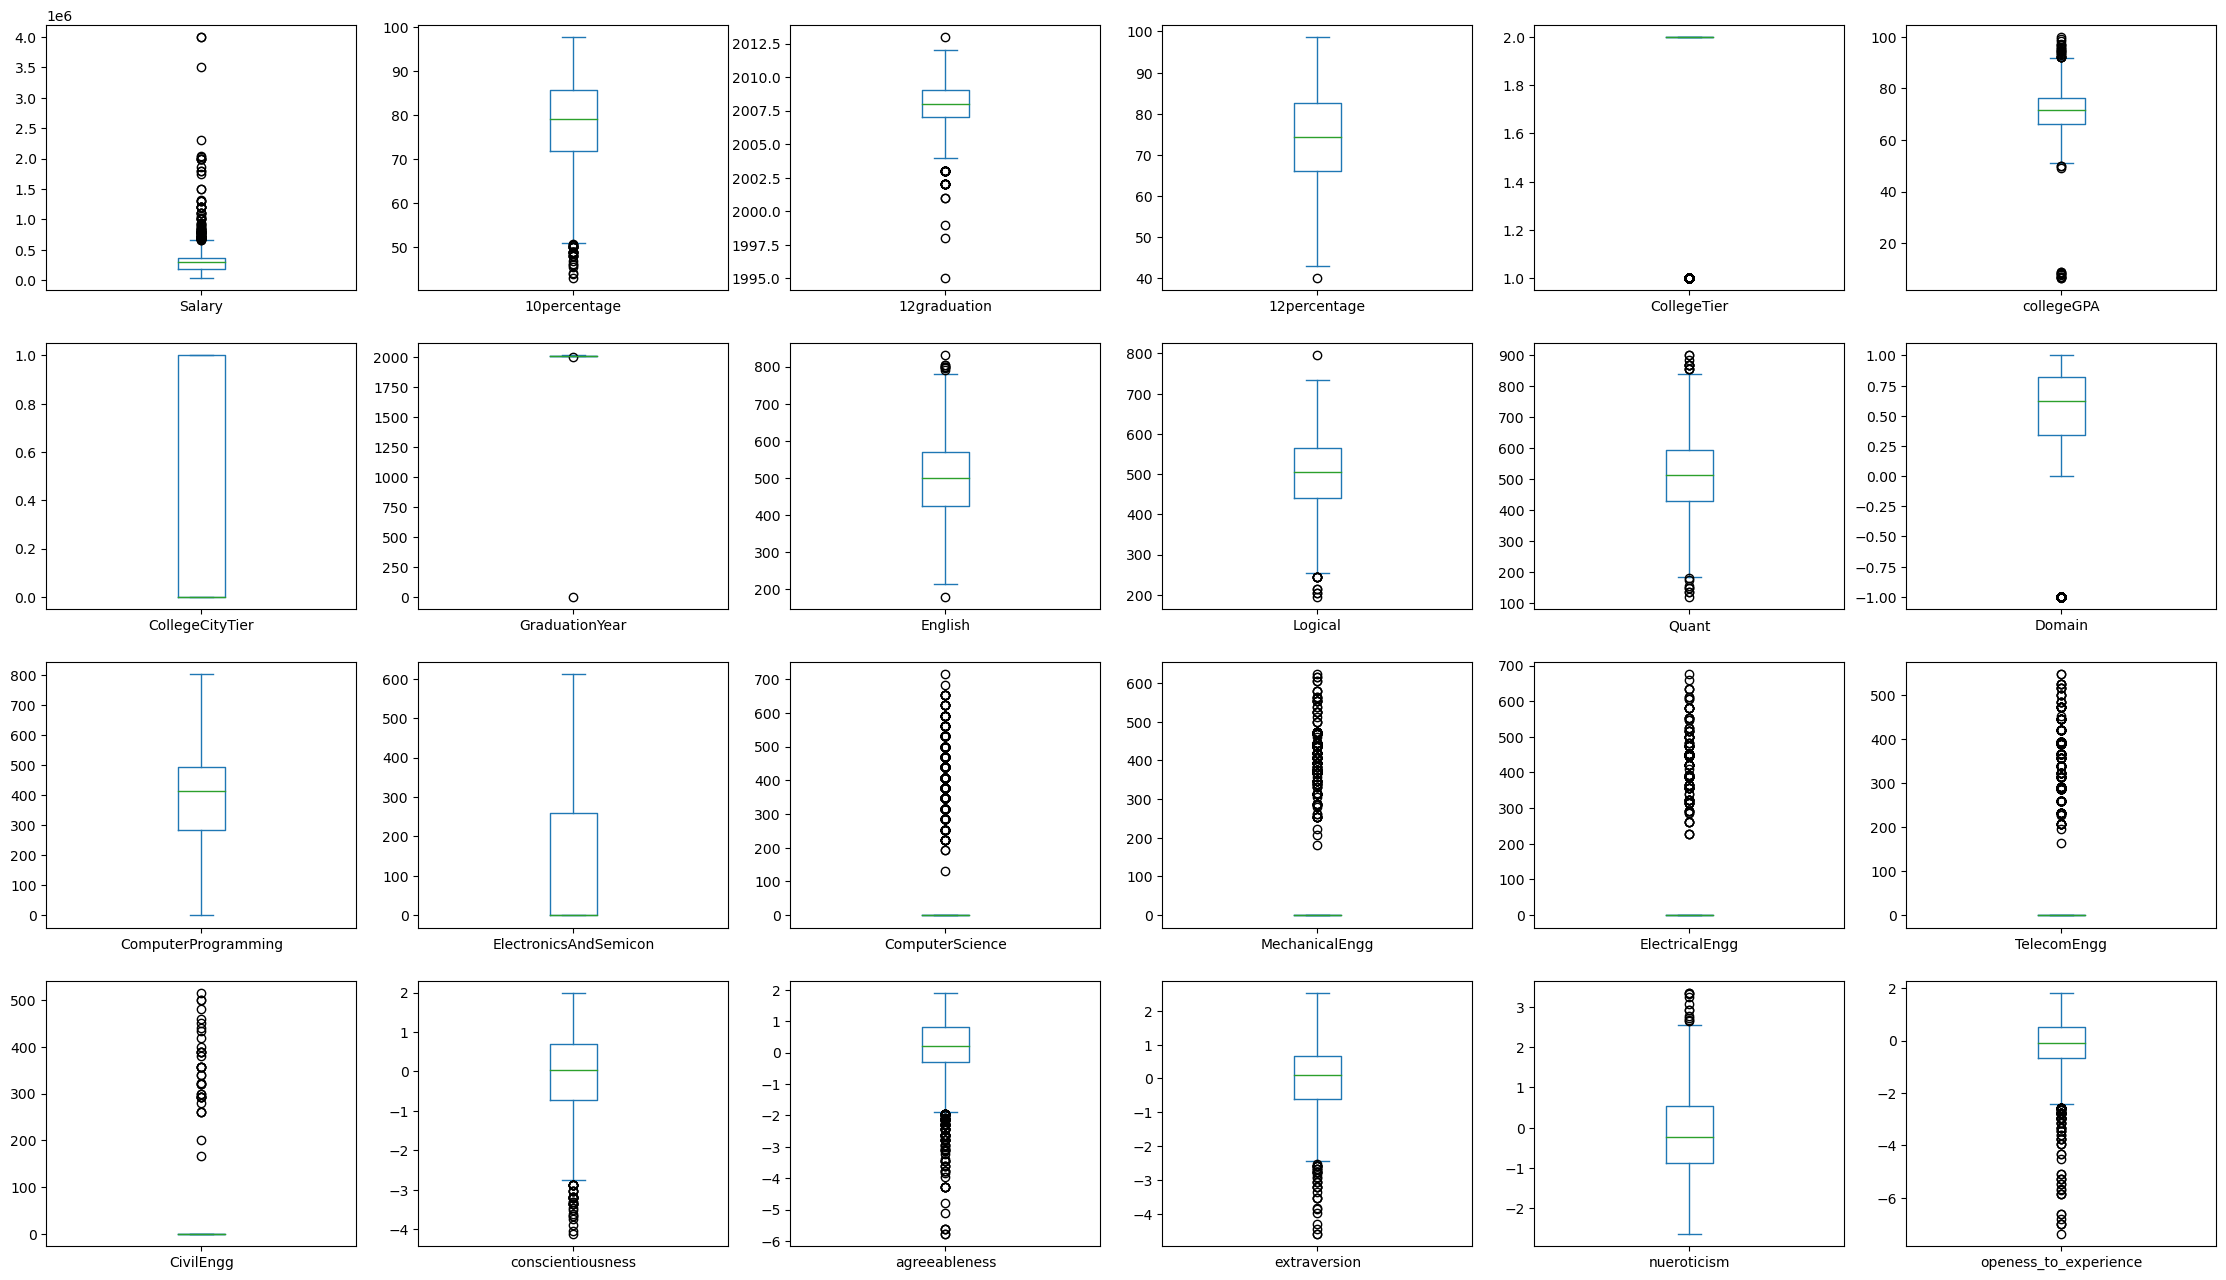

In [63]:
columns_to_plot = [col for col in df.columns if col not in ['ID', 'CollegeID', 'CollegeCityID']]

df[columns_to_plot].plot(kind='box', subplots=True, layout=(5,6), figsize=(28,20))


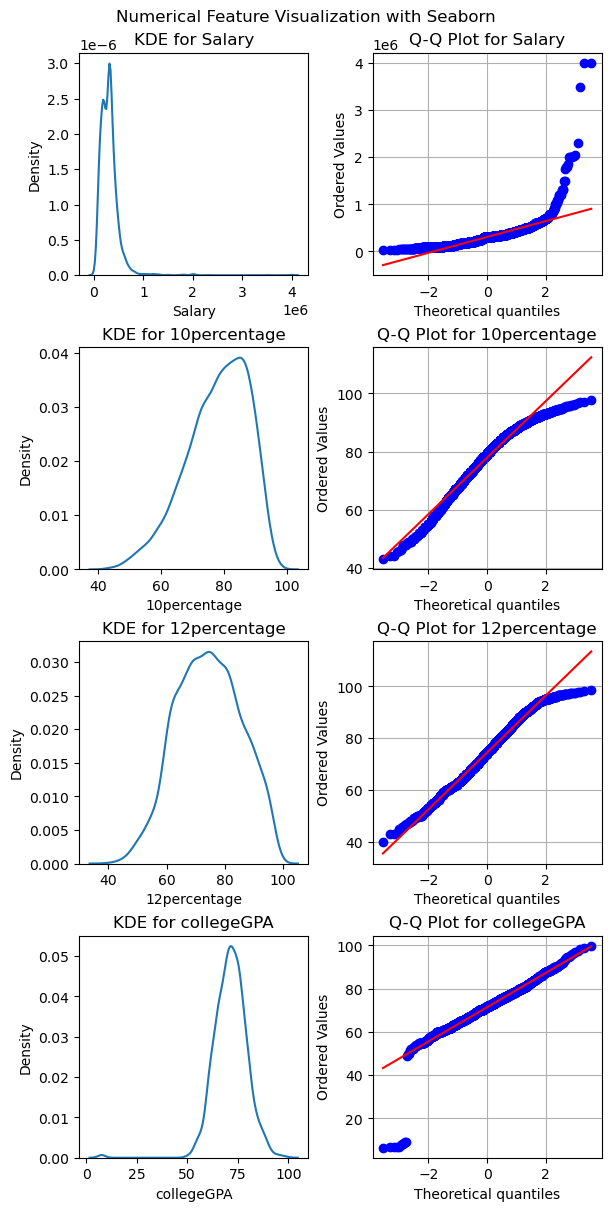

In [64]:
columns_to_visualize = ['Salary', '10percentage', '12percentage', 'collegeGPA']

fig, axs = plt.subplots(len(columns_to_visualize), 2, figsize=(6, 3*len(columns_to_visualize)), constrained_layout=True)
fig.suptitle("Numerical Feature Visualization with Seaborn")

for i, column in enumerate(columns_to_visualize):
    axs[i, 0].set_title(f"KDE for {column}")
    sns.kdeplot(data=df, x=column, ax=axs[i, 0])
    
    stats.probplot(df[column], dist=stats.norm, plot=axs[i, 1])
    axs[i, 1].set_title(f"Q-Q Plot for {column}")
    axs[i, 1].grid()

plt.show()

In [65]:
def shapiro_wilk(data, significance_level):
    stat, p_value = stats.shapiro(data)
    
    print('stat=%.3f, p_value=%.3f' % (stat, p_value))
    
    if p_value < significance_level:
        print('Reject null hypothesis (H0): Probably not Gaussian')
    else:
        print('Fail to Reject null hypothesis (H0): Probably Gaussian')

significance_level = 0.05

print('Salary')
shapiro_wilk(df['Salary'], significance_level)
print()
print('10percentage')
shapiro_wilk(df['10percentage'], significance_level)
print()
print('12percentage')
shapiro_wilk(df['12percentage'], significance_level)
print()

print('collegeGPA')
shapiro_wilk(df['collegeGPA'], significance_level)


Salary
stat=0.651, p_value=0.000
Reject null hypothesis (H0): Probably not Gaussian

10percentage
stat=0.969, p_value=0.000
Reject null hypothesis (H0): Probably not Gaussian

12percentage
stat=0.990, p_value=0.000
Reject null hypothesis (H0): Probably not Gaussian

collegeGPA
stat=0.924, p_value=0.000
Reject null hypothesis (H0): Probably not Gaussian


### Shapiro Wilk Test
The Shapiro-Wilk test is a statistical test that checks whether a dataset follows a normal distribution. It tests the null hypothesis that the data is normally distributed.

### Interpretation

* H0: the sample has a Gaussian distribution.
* H1: the sample does not have a Gaussian distribution.

In [66]:
def shapiro_wilk(data, significance_level):
    stat, p_value = stats.shapiro(data)
    
    print('stat=%.3f, p_value=%.3f' % (stat, p_value))
    
    if p_value < significance_level:
        print('Reject null hypothesis (H0): Probably not Gaussian')
    else:
        print('Fail to Reject null hypothesis (H0): Probably Gaussian')

In [67]:
shapiro_wilk(df['Salary'], 0.05)

stat=0.651, p_value=0.000
Reject null hypothesis (H0): Probably not Gaussian


### Salary:

* Shapiro-Wilk test indicates a significant departure from normality (p < 0.05), suggesting the distribution is likely not Gaussian.
* The visualization reveals potential outliers with salaries significantly higher than the median, indicating possible high-income earners.

### 10percentage:

* Shapiro-Wilk test shows a significant departure from normality (p < 0.05), indicating a non-Gaussian distribution.
* Histogram suggests a skewed distribution, potentially indicating variations in academic performance among students.

### 12percentage:

* Shapiro-Wilk test demonstrates a significant deviation from normality (p < 0.05), implying a non-Gaussian distribution.
* Bimodal distribution observed in the histogram indicates the presence of two distinct peaks, suggesting differences in academic performance among students.

### collegeGPA:

* Shapiro-Wilk test reveals a significant departure from normality (p < 0.05), indicating a non-Gaussian distribution.
* Probability plot deviations from the diagonal line suggest departures from normality, implying the distribution may not follow a perfect normal distribution.

In [68]:
discrete_df.columns

Index(['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree',
       'Specialization', 'CollegeState'],
      dtype='object')

In [69]:
numerical_df.columns

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

# Univariate Viz Analysis - Categorical Data

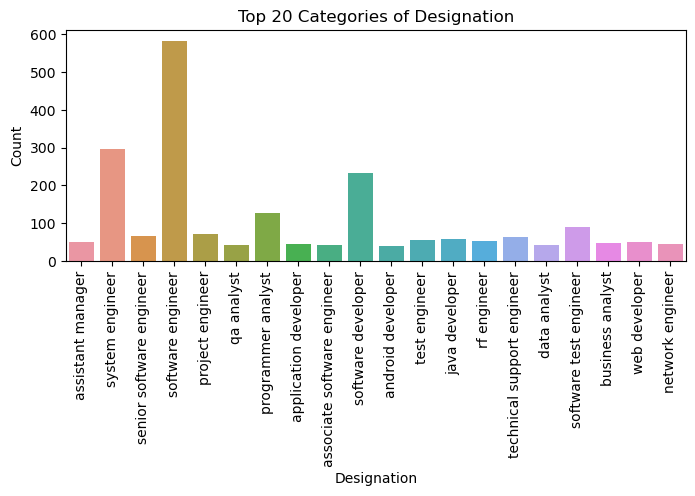

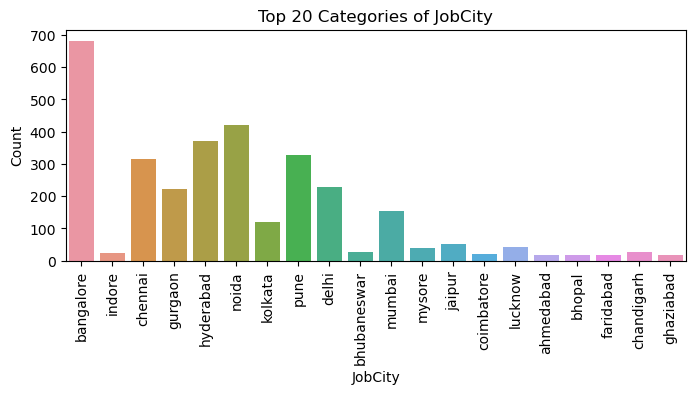

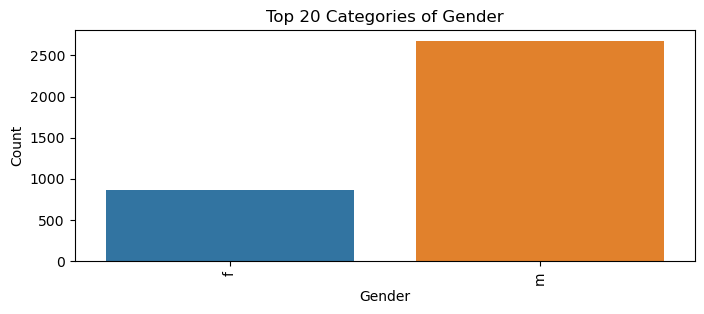

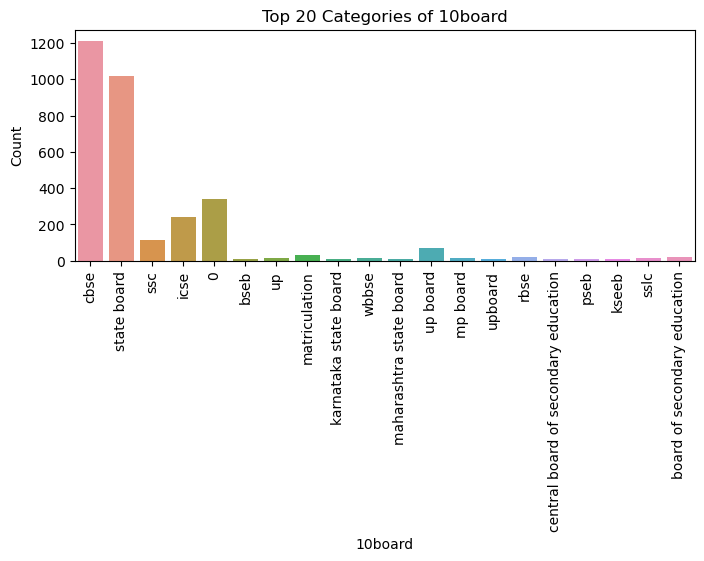

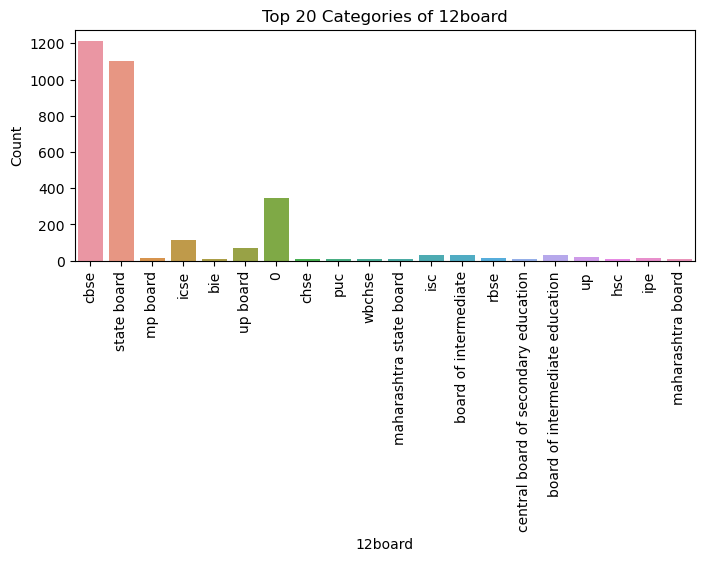

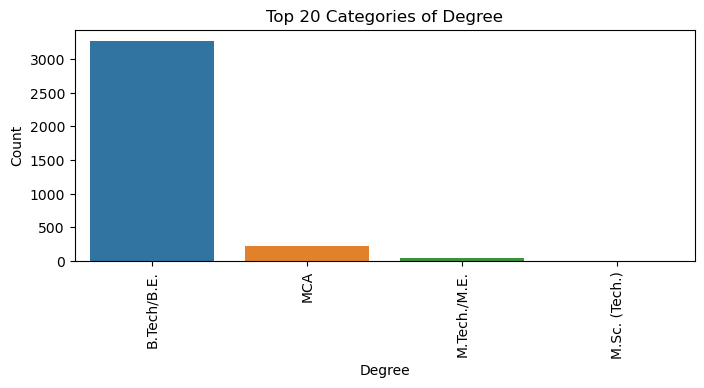

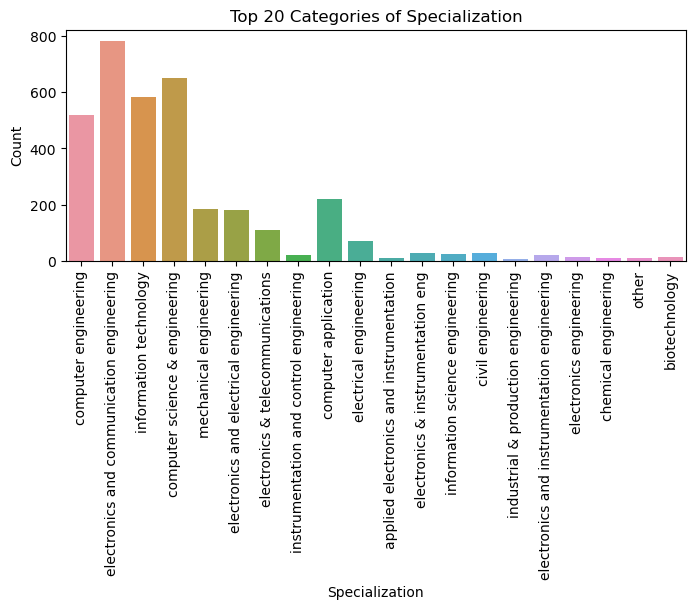

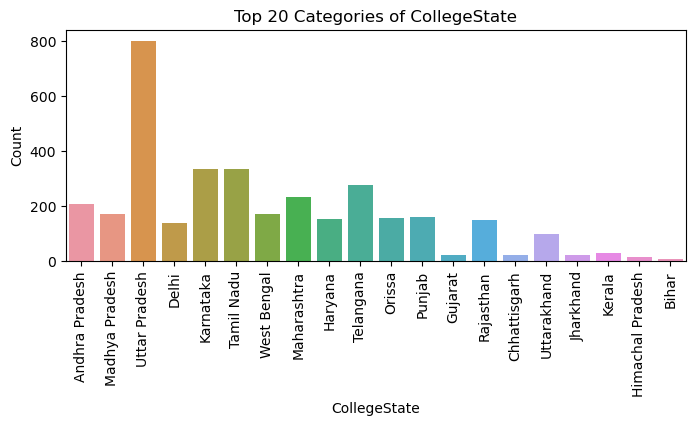

In [70]:
top_n = 20

top_categories = {col: discrete_df[col].value_counts().nlargest(top_n).index for col in discrete_df.columns}

for col, categories in top_categories.items():
    plt.figure(figsize=(8, 3))
    sns.countplot(data=discrete_df[discrete_df[col].isin(categories)], x=col)
    plt.title(f'Top {top_n} Categories of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

In [71]:
def chi_square_good_fit(observed_frequencies, expected_frequencies, significance_level):
    stat, p_value = stats.chisquare(observed_frequencies, expected_frequencies)
    
    print('stat=%.3f, p_value=%.3f' % (stat, p_value))
    
    if p_value < significance_level:
        print('Reject null hypothesis (H0): The observed frequencies do not match the expected frequencies.')
    else:
        print('Fail to Reject null hypothesis (H0): The observed frequencies match the expected frequencies.')

In [72]:
sample = df['Gender'].sample(n=500)

observed_freq = sample.value_counts().tolist()
expected_freq = [300, 200]

chi_square_good_fit(observed_freq, expected_freq, significance_level=0.05)

stat=56.033, p_value=0.000
Reject null hypothesis (H0): The observed frequencies do not match the expected frequencies.


# Bivariate Analysis - Numerical vs Numerical

In [73]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [74]:
numerical_df.columns

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

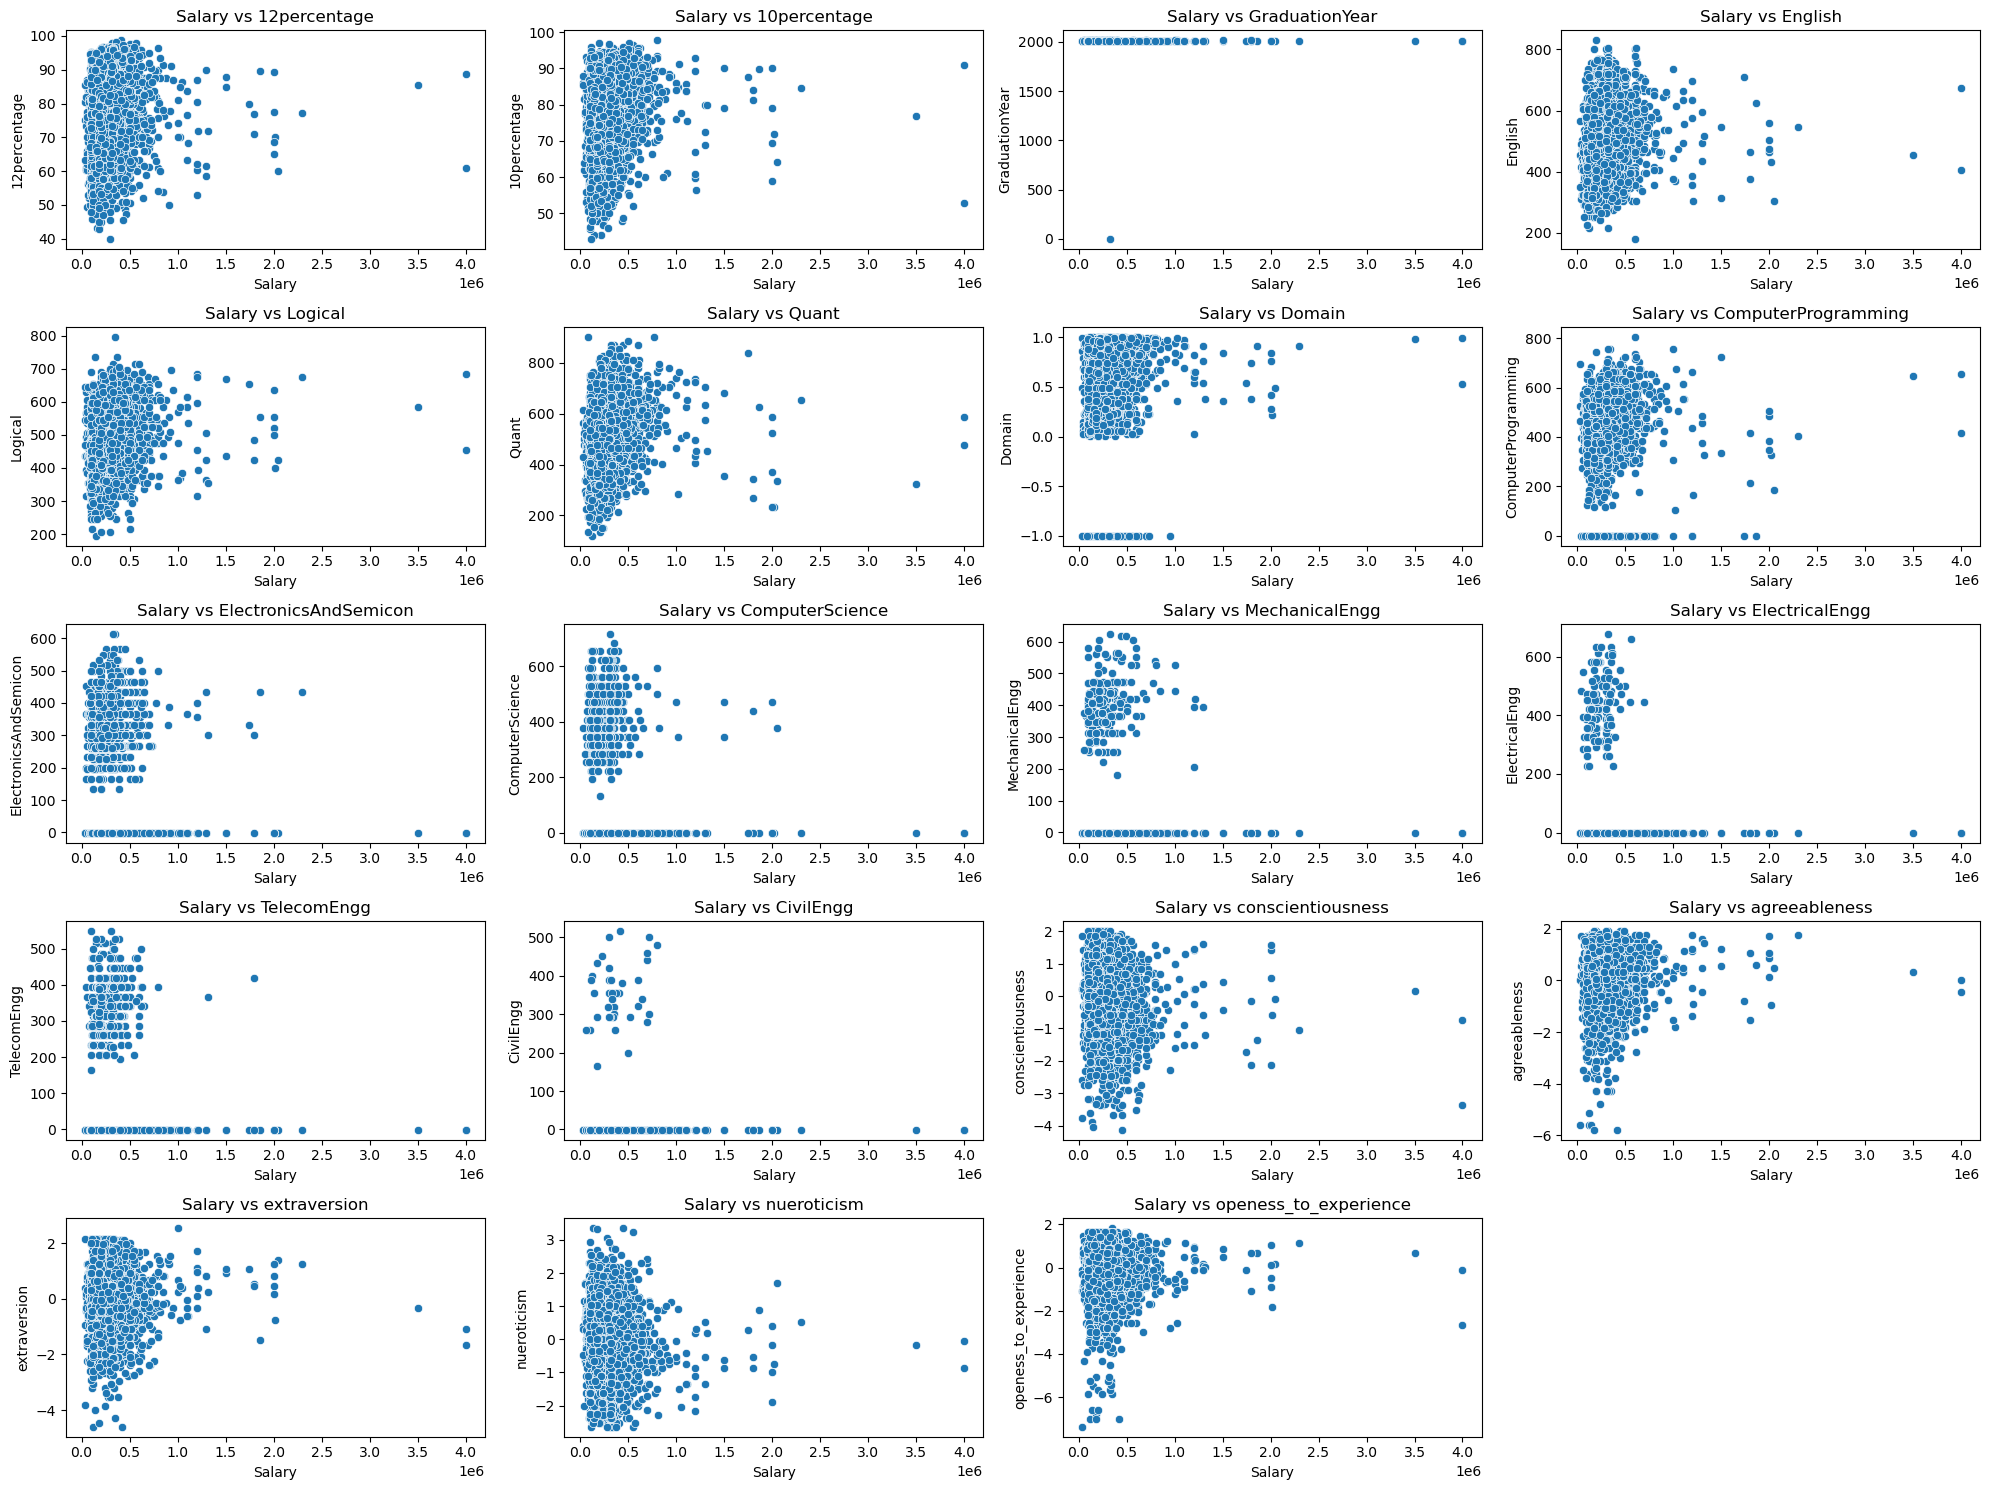

In [75]:
numerical_columns_to_plot = ['12percentage', '10percentage', 'GraduationYear', 'English', 'Logical', 'Quant', 
                             'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 
                             'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 
                             'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 
                             'openess_to_experience']

plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns_to_plot, 1):
    plt.subplot(5, 4, i)
    sns.scatterplot(data=df, x='Salary', y=column)
    plt.title(f'Salary vs {column}')
    plt.xlabel('Salary')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


### Pearson’s Correlation Coefficient
Tests whether two samples have a linear relationship.

### Interpretation

* H0: the two samples are independent.
* H1: there is a dependency between the samples.

In [76]:
def pearson_test(data1, data2, significance_level):
    stat, p_value = stats.pearsonr(data1, data2)
    
    print('stat=%.3f, p=%.3f' % (stat, p_value))
    
    if p_value < significance_level:
        print('Reject null hypothesis (H0): Probably a linear relationship exists')
    else:
        print('Fail to Reject null hypothesis (H0): Probably a linear relationship does not exist')

print("Pearson Correlation Test for Salary vs collegeGPA:")
pearson_test(df['Salary'], df['collegeGPA'], significance_level=0.05)
print()

other_numerical_columns = ['12percentage', '10percentage', 'GraduationYear', 'English', 'Logical', 'Quant', 
                          'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 
                          'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 
                          'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 
                          'openess_to_experience']

for column in other_numerical_columns:
    print(f"Pearson Correlation Test for Salary vs {column}:")
    pearson_test(df['Salary'], df[column], significance_level=0.05)
    print()

Pearson Correlation Test for Salary vs collegeGPA:
stat=0.139, p=0.000
Reject null hypothesis (H0): Probably a linear relationship exists

Pearson Correlation Test for Salary vs 12percentage:
stat=0.180, p=0.000
Reject null hypothesis (H0): Probably a linear relationship exists

Pearson Correlation Test for Salary vs 10percentage:
stat=0.177, p=0.000
Reject null hypothesis (H0): Probably a linear relationship exists

Pearson Correlation Test for Salary vs GraduationYear:
stat=-0.010, p=0.565
Fail to Reject null hypothesis (H0): Probably a linear relationship does not exist

Pearson Correlation Test for Salary vs English:
stat=0.164, p=0.000
Reject null hypothesis (H0): Probably a linear relationship exists

Pearson Correlation Test for Salary vs Logical:
stat=0.183, p=0.000
Reject null hypothesis (H0): Probably a linear relationship exists

Pearson Correlation Test for Salary vs Quant:
stat=0.229, p=0.000
Reject null hypothesis (H0): Probably a linear relationship exists

Pearson Corre

### Positive Linear Relationships:

* 'Salary' exhibits statistically significant positive linear relationships with:
* 'collegeGPA', '12percentage', '10percentage', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'CivilEngg', 'conscientiousness', 'agreeableness', and 'nueroticism'.

* Higher values in these columns tend to correspond to higher salaries.

### No Significant Linear Relationships:

* 'Salary' does not show statistically significant linear relationships with:
* 'GraduationYear', 'ElectronicsAndSemicon', 'MechanicalEngg', 'TelecomEngg', 'extraversion', and 'openess_to_experience'.
* Salary does not notably vary based on these factors.

### Negative Linear Relationships:

* 'Salary' exhibits statistically significant negative linear relationships with:
* 'ElectricalEngg'.
* Higher values in this column tend to correspond to lower salaries.

## Bivariate Analysis - Categorical vs Categorical

In [77]:
discrete_df.columns

Index(['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree',
       'Specialization', 'CollegeState'],
      dtype='object')

Text(0.5, 1.0, 'Degree vs Gender')

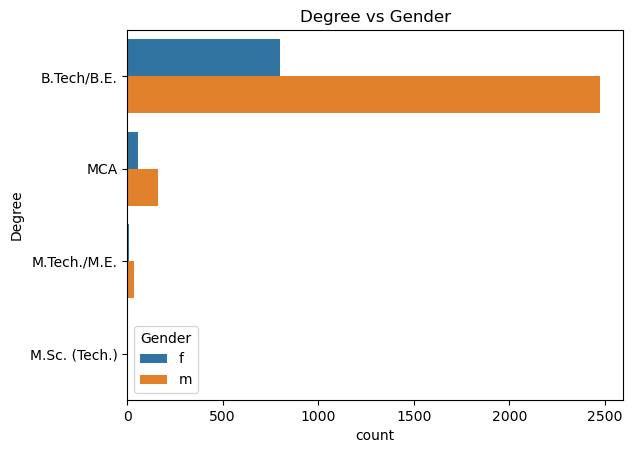

In [78]:
sns.countplot(data=df, y='Degree', hue='Gender')

plt.title('Degree vs Gender')

## Chi-Squared Test for Independence

### Interpretation

* H0: the two samples are independent.
* H1: there is a dependency between the samples.

In [79]:
def chi_square(freq_table, significance_level):
    stat, p_val, dof, expected = stats.chi2_contingency(freq_table)
    
    print('stat=%.3f, p=%.3f' % (stat, p_val))
    
    if p_val < significance_level:
        print('Reject null hypothesis (H0): Probably dependent')
    else:
        print('Fail to Reject null hypothesis (H0): Probably independent')

In [80]:
freq_table = pd.crosstab(df['Degree'], df['Gender'])

freq_table

Gender,f,m
Degree,,
B.Tech/B.E.,800,2471
M.Sc. (Tech.),1,1
M.Tech./M.E.,9,37
MCA,55,163


In [81]:
chi_square(freq_table, significance_level=0.05)

stat=1.373, p=0.712
Fail to Reject null hypothesis (H0): Probably independent


### Degree vs. Gender:

* The chi-square statistic is 2.172 with a p-value of 0.538.
* The null hypothesis (H0) is not rejected at the 0.05 significance level.
* Therefore, there is insufficient evidence to suggest that there is a relationship between the degree and the gender of individuals.

In [82]:
freq_table = pd.crosstab(df['Designation'], df['Gender'])

freq_table

Gender,f,m
Designation,,
.net developer,7,24
.net web developer,1,1
account executive,2,2
admin assistant,0,2
administrative support,1,0
...,...,...
ux designer,1,1
web application developer,1,5
web designer,5,5


In [83]:
chi_square(freq_table, significance_level=0.05)

stat=343.248, p=0.000
Reject null hypothesis (H0): Probably dependent


### Designation vs. Gender:

* A frequency table was generated for the cross-tabulation of Designation and Gender.
* The chi-square statistic is 526.869 with a p-value of 0.000.
* The null hypothesis (H0) is rejected at the 0.05 significance level.
* Therefore, there is evidence to suggest that there is a relationship between the designation and the gender of individuals.

## Bivariate Analysis - Numerical vs Categorical

In [84]:
discrete_df.columns

Index(['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree',
       'Specialization', 'CollegeState'],
      dtype='object')

In [85]:
# Perform groupby on 'Degree' and calculate the mean salary for each degree
degree_salary_mean = df.groupby('Degree')['Salary'].mean()

# Perform groupby on 'Gender' and calculate the median salary for each gender
gender_salary_median = df.groupby('Gender')['Salary'].median()

# Print the results
print("Mean Salary by Degree:")
print(degree_salary_mean)
print("\nMedian Salary by Gender:")
print(gender_salary_median)


Mean Salary by Degree:
Degree
B.Tech/B.E.      308951.085295
M.Sc. (Tech.)    320000.000000
M.Tech./M.E.     365543.478261
MCA              285871.559633
Name: Salary, dtype: float64

Median Salary by Gender:
Gender
f    300000.0
m    300000.0
Name: Salary, dtype: float64


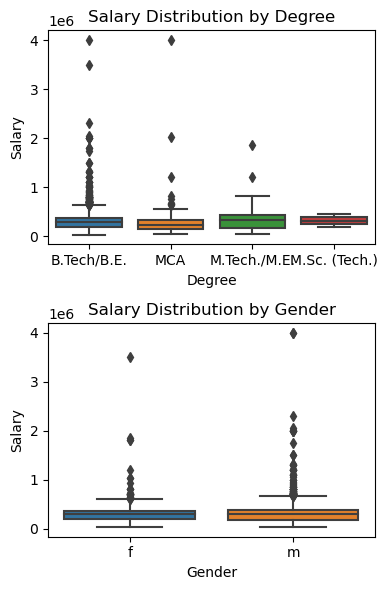

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the subplots
fig, axes = plt.subplots(2, 1, figsize=(4,6))  # 2 rows, 1 column

# Plot boxplots
sns.boxplot(data=df, x='Degree', y='Salary', ax=axes[0])
axes[0].set_title('Salary Distribution by Degree')

sns.boxplot(data=df, x='Gender', y='Salary', ax=axes[1])
axes[1].set_title('Salary Distribution by Gender')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [87]:
numerical_df.columns

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

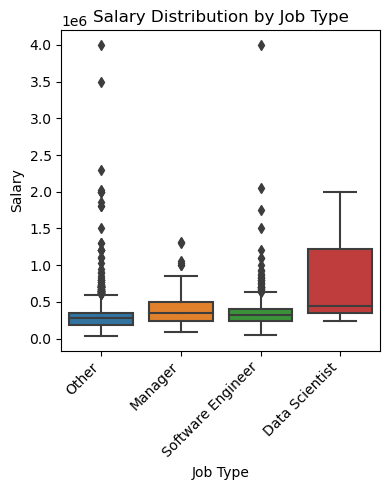

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

def categorize_designation(designation):
    if 'software engineer' in designation.lower():
        return 'Software Engineer'
    elif 'data scientist' in designation.lower():
        return 'Data Scientist'
    elif 'manager' in designation.lower():
        return 'Manager'
    else:
        return 'Other'

df['Job Type'] = df['Designation'].apply(categorize_designation)

plt.figure(figsize=(4, 5))
sns.boxplot(data=df, x='Job Type', y='Salary')
plt.title('Salary Distribution by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


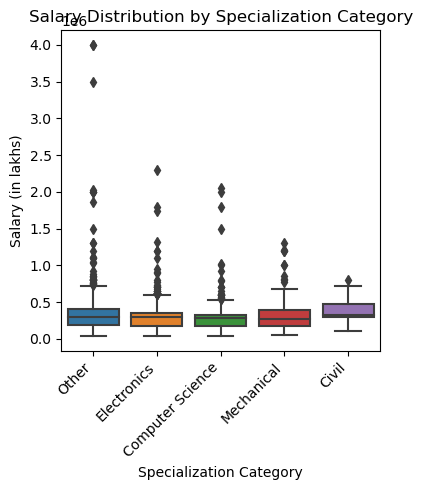

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

def categorize_specialization(specialization):
    if 'computer science' in specialization.lower():
        return 'Computer Science'
    elif 'mechanical' in specialization.lower():
        return 'Mechanical'
    elif 'electronics' in specialization.lower():
        return 'Electronics'
    elif 'civil' in specialization.lower():
        return 'Civil'
    else:
        return 'Other'

df['Specialization Category'] = df['Specialization'].apply(categorize_specialization)

plt.figure(figsize=(4, 5))
sns.boxplot(data=df, x='Specialization Category', y='Salary')
plt.title('Salary Distribution by Specialization Category')
plt.xlabel('Specialization Category')
plt.ylabel('Salary (in lakhs)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


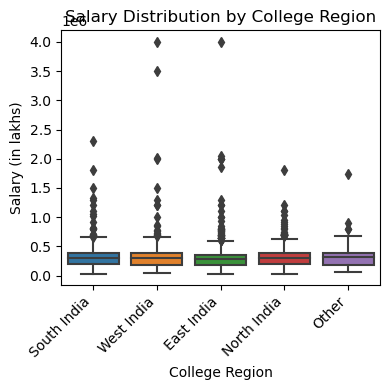

In [90]:
def categorize_college_state(college_state):

    if college_state in ['Karnataka', 'Tamil Nadu', 'Andhra Pradesh', 'Telangana', 'Kerala']:
        return 'South India'
    elif college_state in ['Maharashtra', 'Gujarat', 'Madhya Pradesh', 'Rajasthan', 'Goa']:
        return 'West India'
    elif college_state in ['Uttar Pradesh', 'Bihar', 'West Bengal', 'Odisha', 'Jharkhand']:
        return 'East India'
    elif college_state in ['Delhi', 'Haryana', 'Punjab', 'Uttarakhand', 'Himachal Pradesh']:
        return 'North India'
    else:
        return 'Other'

df['College Region'] = df['CollegeState'].apply(categorize_college_state)

plt.figure(figsize=(4, 4))
sns.boxplot(data=df, x='College Region', y='Salary')
plt.title('Salary Distribution by College Region')
plt.xlabel('College Region')
plt.ylabel('Salary (in lakhs)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Research Question
After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.

In [91]:
research = df[df['Designation'].isin(['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer'])]
research

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Job Type,Specialization Category,College Region
6,947847,300000,2014-08-01,2015-05-01,software engineer,bangalore,m,1993-02-01,86.08,state board,...,-1,-1,1.7081,-0.1054,-1.0379,-2.0092,-1.0872,Software Engineer,Computer Science,South India
14,1279958,300000,2013-07-01,2015-12-01,software engineer,bangalore,m,1992-07-02,81.20,state board,...,-1,-1,0.7027,0.7119,0.0100,-0.9950,0.6721,Software Engineer,Other,East India
19,466888,325000,2014-09-01,2015-12-01,software engineer,pune,f,1990-11-30,79.00,cbse,...,-1,-1,0.8192,0.2668,-0.2714,-0.4078,-0.1295,Software Engineer,Other,East India
20,140069,320000,2010-11-01,2012-09-01,software engineer,bangalore,f,1988-07-25,91.20,karnataka secondary school of examination,...,-1,-1,-0.1082,0.9688,0.5269,-0.2902,0.3444,Software Engineer,Other,South India
24,963123,335000,2014-06-01,2015-06-01,programmer analyst,hyderabad,m,1993-06-28,88.00,state board,...,-1,-1,0.4155,0.8027,0.1357,-0.9950,-0.6692,Other,Computer Science,South India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,1077872,220000,2014-09-01,2015-12-01,software engineer,gurgaon,m,1991-12-17,53.40,cbse,...,-1,-1,0.1282,-0.2871,-0.1437,-1.1218,1.4386,Software Engineer,Computer Science,West India
3982,553436,160000,2012-05-01,2014-06-01,software engineer,secunderabad,m,1989-06-10,83.00,ssc,...,-1,-1,-0.0154,0.5454,0.6248,-1.2486,1.0554,Software Engineer,Other,South India
3984,305041,480000,2011-12-01,2015-12-01,software engineer,gurgaon,f,1990-01-18,89.80,cbse,...,-1,-1,-0.2628,0.1888,0.3817,-0.2902,1.6082,Software Engineer,Other,North India
3989,1204604,300000,2014-09-01,2015-12-01,software engineer,bangalore,m,1991-11-23,74.88,state board,...,-1,-1,0.1282,0.0459,1.2396,1.0333,0.6721,Software Engineer,Computer Science,South India


### Research Question 1: Correlation between academic performance and salary


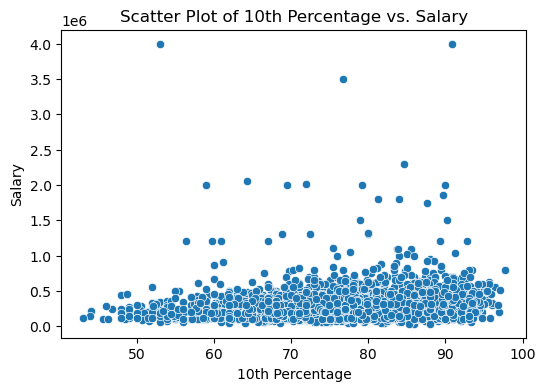

In [92]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='10percentage', y='Salary', data=df)
plt.title('Scatter Plot of 10th Percentage vs. Salary')
plt.xlabel('10th Percentage')
plt.ylabel('Salary')
plt.show()

⭐OBSERVATION OF **Correlation between academic performance and salary:**

<div style = 'background:lightskyblue'>
    
* The scatter plot of 10th percentage versus salary indicates a potential positive correlation between academic performance in the 10th grade and salary levels.
    
* As the 10th percentage increases, there seems to be a trend of higher salaries, suggesting that individuals with better performance in their 10th grade examinations may earn higher salaries.</div>

### Research Question 2: Salary distributions across different educational degrees


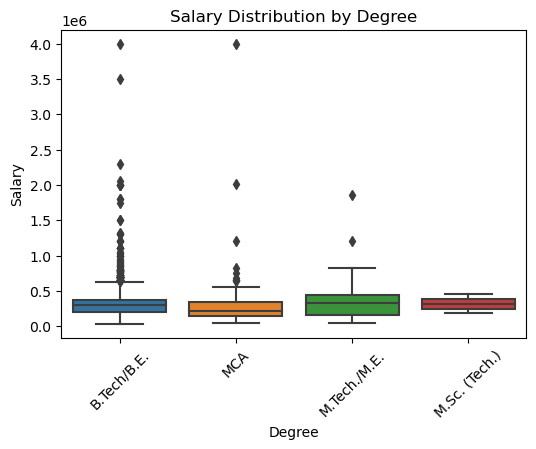

In [93]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Degree', y='Salary', data=df)
plt.title('Salary Distribution by Degree')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

⭐OBSERVATION OF **Salary Distribution by Degree:**

<div style = 'background:lightskyblue'>

* The plot shows that individuals with degrees in B.Tech/BE and MCA tend to have higher salaries compared to other degrees.
  
   
    
* It indicates a potential correlation between educational qualification and salary level, with B.Tech/BE and MCA leading in terms of salary distribution.</div>

### Research Question 3: Impact of gender on salary levels


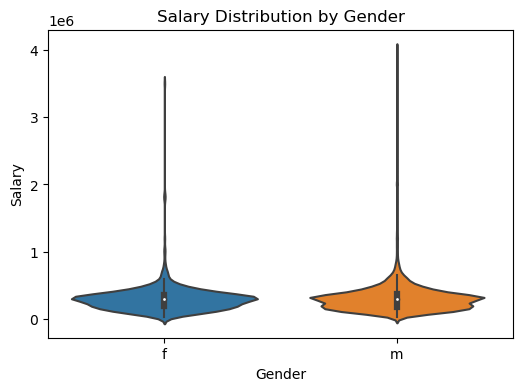

In [94]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Gender', y='Salary', data=df)
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

⭐OBSERVATION OF **Salary Distribution by Gender:**

<div style = 'background:lightskyblue'>
    
* The plot suggests that males generally have higher salaries compared to females, as the highest salary range is more prominent for males.
    .
* This highlights potential gender disparities in salary levels, warranting further investigation into factors contributing to this gap.</div>

### Research Question 4: Salary distributions across different job roles


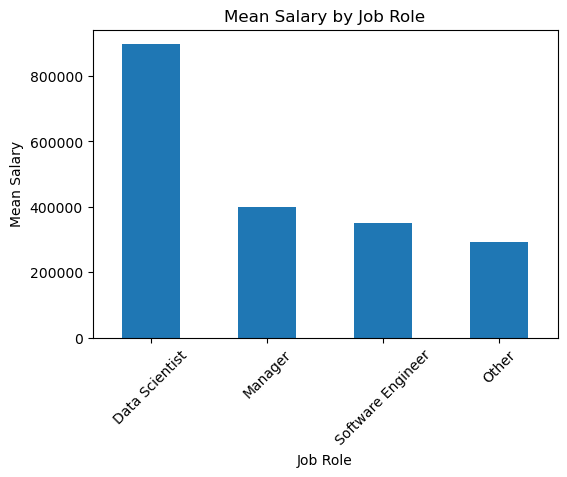

In [95]:
mean_salary_by_job = df.groupby('Job Type')['Salary'].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
mean_salary_by_job.plot(kind='bar')
plt.title('Mean Salary by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Mean Salary')
plt.xticks(rotation=45)
plt.show()

⭐OBSERVATION OF Salary Distribution by Job Type:
    
<div style = 'background:lightskyblue'>


* Data Scientists appear to have the highest salary range, indicating the demand and premium associated with this role.
* The presence of outliers in other job types suggests variability in salary levels within those roles, possibly due to factors like experience, skills, or industry.</div>